In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}table{margin-left: 0 !important;}</style>")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.dates import DayLocator, MonthLocator, DateFormatter, drange
import seaborn as sns

# Team Member Names

|Name |
|:--------|
|Sabrina Purvis |
|Brian Gaither |
|Aurian Ghaemmaghami |
|Andrew Larsen |

# Business Understanding

# *Add more about inertia and silhouette score*

The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  
  
As you will see below, we believe we can find meaningful clusters in time of day, day of week, day of month and possibly even season with relation to crime counts and locations.  
 
We are exploring two specific aims with this dataset:
1. Cluster based on number of crimes per day, as well as various factors that could affect this number.
2. Cluster based on crime profile. 

Our definition of a successful model is one that is able to provide actionable insights and intel.  We hope that being able to cluster types of crimes will allow practical application around policing. 

We plan to use inertia and silhouette score in order to score our clustering algorithms. Inertia, also known as within cluster sum-of-squares, is a good method of determining how many clusters one should have. Silhouette score is a score between -1 and +1 that allows us to compare how good each clustering algorithm is. 

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  






<a id="top"></a>
## Contents
* <a href="#Approach1">Approach 1</a>
    * <a href="#App1ModEval1">Modeling and Evaluation 1</a>
        * <a href="#App1ModEval1DU">Data Understanding</a>
        * <a href="#App1ModEval1Cluster">Cluster Analysis</a>
        * <a href="#App1ModEval1Effectiveness">Measuring Effectiveness</a>
    * <a href="#App1ModEval2">Modeling and Evaluation 2</a>
        * <a href="#App1ModEval2DU">Data Understanding</a>
        * <a href="#App1ModEval2Cluster">Cluster Analysis</a>
        * <a href="#App1ModEval2Effectiveness">Measuring Effectiveness</a>
    * <a href="#App1Compare">Approach 1 - Comparing Method 1 and 2</a>
* <a href="#Approach2">Approach 2</a>
    * <a href="#App2ModEval1">Modeling and Evaluation 1</a>
        * <a href="#App2ModEval1DU">Data Understanding</a>
        * <a href="#App2ModEval1Cluster">Cluster Analysis</a>
        * <a href="#App2ModEval1Effectiveness">Measuring Effectiveness</a>
    * <a href="#App2ModEval2">Modeling and Evaluation 2</a>
        * <a href="#App2ModEval2DU">Data Understanding</a>
        * <a href="#App2ModEval2Cluster">Cluster Analysis</a>
        * <a href="#App2ModEval2Effectiveness">Measuring Effectiveness</a>
    * <a href="#App2Compare">Approach 2 - Comparing Method 1 and 2</a>
* <a href="#Deploy">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>


<a id="Approach1"></a>
<a href="#top">Back to Top</a>
# Approach 1

<a id="App1ModEval1"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 1

<a id="App1ModEval1DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

The point of this analysis is to cluster based on the variables that were used in our KNN model in lab 2. KNN regression and K-means are similar in that they use the distance between points to reach their desired goal. We hope that applying K-means clustering on the same variables will aid in our analysis of our KNN regression model.

Here, we read in the data and parse the CMPLNT_FR_DT variable as datetime.

In [3]:
df = pd.read_csv('/home/drew/School/Semester4/ML1/NewYorkCityCrimes2015/Data/Lab2_Daily_Crime_Volume_Data/Training_and_Test_Set.csv',
                parse_dates = ['CMPLNT_FR_DT'])

As you can see below, there are many variables that are non-numeric. K-means clustering accepts only numeric variables, so we must do some pre-processing in order to use these variables in our model.

In [12]:
df.head(10)

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,PRCP,...,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event,count_cmplnt
0,2014-11-26,Morning,Wednesday,November,26.0,2014.0,Fall,66.0,QUEENS,1.24,...,34,51,"2,250,002",40997,Medium,NaN,NaN,0,0,1
1,2014-12-01,Late Night,Monday,December,1.0,2014.0,Winter,60.0,QUEENS,0.09,...,42,65,"2,250,002",40997,Medium,NaN,NaN,0,0,1
2,2015-11-10,Morning,Tuesday,November,10.0,2015.0,Fall,15.0,BROOKLYN,0.26,...,51,57,"2,552,911",43915,High,NaN,NaN,0,0,2
3,2014-02-04,Morning,Tuesday,February,4.0,2014.0,Winter,48.0,QUEENS,0.00,...,22,35,"2,250,002",40997,Medium,NaN,NaN,0,0,3
4,2015-08-25,Late Night,Tuesday,August,25.0,2015.0,Summer,35.0,BROOKLYN,0.00,...,73,90,"2,552,911",43915,High,NaN,NaN,0,0,1
5,2014-09-03,Morning,Wednesday,September,3.0,2014.0,Fall,23.0,STATEN ISLAND,0.00,...,72,86,"468,730",48123,Low,NaN,US Open Tennis,0,1,1
6,2015-09-17,Morning,Thursday,September,17.0,2015.0,Fall,49.0,QUEENS,0.00,...,68,89,"2,250,002",44031,Medium,NaN,New York Boat Show,0,1,7
7,2015-01-29,Morning,Thursday,January,29.0,2015.0,Winter,35.0,BROOKLYN,0.02,...,19,36,"2,552,911",43915,High,NaN,NaN,0,0,5
8,2015-03-12,Evening,Thursday,March,12.0,2015.0,Spring,67.0,QUEENS,0.00,...,36,47,"2,250,002",44031,Medium,NaN,NaN,0,0,1
9,2014-06-23,Late Night,Monday,June,23.0,2014.0,Summer,48.0,QUEENS,0.00,...,65,81,"2,250,002",40997,Medium,NaN,NaN,0,0,3


Our Day_Name variable was built off of the CMPLNT_FR_DT variable. In order to turn that variable into a numeric variable, we simply use the dt.dayofweek function from pandas in order to change "Monday" to 0, "Tuesday" to 1 etc. 

In [5]:
df['DayOfWeek'] = df['CMPLNT_FR_DT'].dt.dayofweek

Similar to the dayofweek function, dt.month turns January into 1, February into 2, etc. We use this function to change our Month variable into a numeric variable. 

In [6]:
df['Month_No'] = df['CMPLNT_FR_DT'].dt.month
df_Crime = df

As you can see in the plot below, there does seem to be a temporal dependence of number of crimes. Crimes seem to peak in the summer and drop in the winter. We encode this temporal dependence as numeric variables identifying the month, the year and the day. There may be a couple of outliers on the high end of this distribution, but none that are concerning.

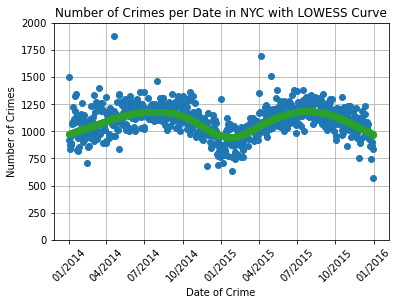

In [15]:
df_Crime['CMPLNT_FR_DT'] = pd.to_datetime(df_Crime['CMPLNT_FR_DT'], format = '%m/%d/%Y')
crimeByDate = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Date of Crime')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.ylim(-5, 2000)
plt.title('Number of Crimes per Date in NYC with LOWESS Curve')
plt.plot_date(crimeByDate['CMPLNT_FR_DT'], crimeByDate['count_cmplnt'])
plt.plot_date(crimeByDate['CMPLNT_FR_DT'],lowess(crimeByDate['count_cmplnt'],crimeByDate['CMPLNT_FR_DT'], frac = .25))
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
ax.xaxis.set_major_formatter(DateFormatter('%m/%Y'))
plt.show()

As you can see in the plot below, there does seem to be a dependence of number of crimes on the burough. Borough is categorical, but we have 3 numeric variables that correspond to the borough: Population, Hm_Sls_Price_Range and PC_INCOME, so we only need one of these variables in our final model. The population variable was chosen due to the ease of turning this variable into numeric, though we could have used any other variable listed above. 

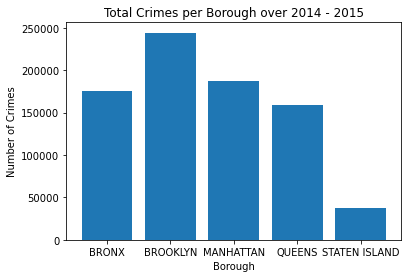

In [16]:
borodf = df_Crime.groupby('BORO_NM')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Borough')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Borough over 2014 - 2015')
plt.bar(borodf['BORO_NM'], borodf['count_cmplnt']);

The time of day does look to have some influence on the number of crimes as well, with evening and day time seeming to have the most crimes, although morning and night have the 4 largest count_cmplnts. There are some outliers here, as most of the occurances have less than 10 crimes. That isn't a mistake, but it is important to keep in mind that this variable is right skewed

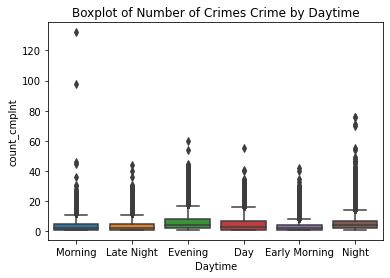

In [17]:
ax = sns.boxplot(x="Daytime", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Daytime");

Below is a graph of the total crimes per day of the week over 2014 - 2015. The most crimes occur on Friday, and the fewest crimes occur on Sunday. There isn't a large difference between the individual days of the week, but there may be enough difference between Friday and Sunday to have an impact on our models. 

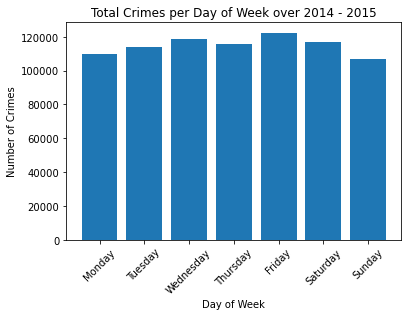

In [18]:
dowdf = df_Crime.groupby('DayOfWeek')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Day of Week over 2014 - 2015')
plt.bar(dowdf['DayOfWeek'], dowdf['count_cmplnt']);
ax.xaxis.set_tick_params(rotation=45, labelsize=10)
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

In order to bring the latitude and longitude into the grouped analysis, we created 100 GeoCells to bin the locations of crimes. When we plot the number of crimes by location, we find a large difference between the 100 geocells. GeoCell number 87 has a two year crime count of 48,434, while many of these GeoCells have no crime at all. Crime count has a large dependence on location. A bar plot was chosen since we were interested in looking at the total number of crimes across levels of a categorical variable. 

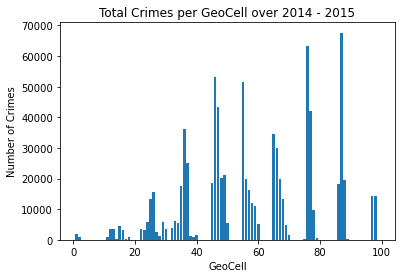

In [19]:
locdf = df_Crime.groupby('GeoCell')['count_cmplnt'].sum().reset_index()
fig, ax = plt.subplots()
plt.xlabel('GeoCell')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per GeoCell over 2014 - 2015')
plt.bar(locdf['GeoCell'], locdf['count_cmplnt']);

When we look at the number of crimes per day vs. the daily high temperature, we can see that crime seems to increase lineraly as temperature increases. This seems to confirm what we saw in the plot of crimes per month: the colder winter months have lower amounts of crime, while the warmer summer months have larger amounts of crime. 

<ipython-input-20-12e0611d08f5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_df = df_Crime.groupby('CMPLNT_FR_DT')['TMAX','TMIN', 'SNOW', 'PRCP'].max();


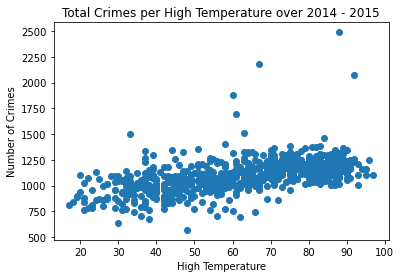

In [20]:
datedf = df_Crime.groupby('CMPLNT_FR_DT')['count_cmplnt'].sum().reset_index()
temp_df = df_Crime.groupby('CMPLNT_FR_DT')['TMAX','TMIN', 'SNOW', 'PRCP'].max();
tempdf = datedf.join(temp_df, on = 'CMPLNT_FR_DT');
fig, ax = plt.subplots()
plt.scatter(tempdf['TMAX'], tempdf['count_cmplnt']);
plt.xlabel('High Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per High Temperature over 2014 - 2015');

The daily low temperature is highly correlated with the daily high temperature, so the plot of low temperature vs. number of crimes is nearly identical to the high temperature vs. number of crimes. Both were included in the KNN model due to potential extreme fluxuations in temperature in New York City. 

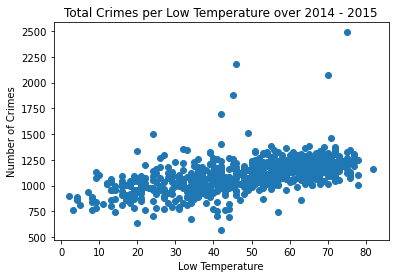

In [21]:
fig, ax = plt.subplots()
plt.scatter(tempdf['TMIN'], tempdf['count_cmplnt'])
plt.xlabel('Low Temperature')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes per Low Temperature over 2014 - 2015');

Here, we look at the amount of snow vs. the crime count. It does not snow very often in New York so it is hard to tell if there is a trend with so few data points, but number of crimes does seem to have a negative linear dependence on the amount of snow that New York recieves.

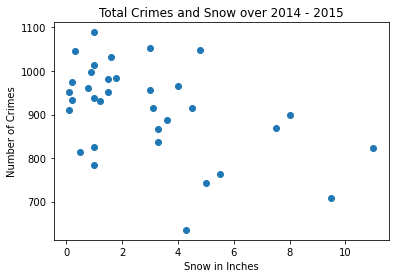

In [22]:
snowdf = tempdf[tempdf['SNOW'] > 0]
fig, ax = plt.subplots()

plt.scatter(snowdf['SNOW'], snowdf['count_cmplnt'])
plt.xlabel('Snow in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Snow over 2014 - 2015');

Here, we look at the amount of daily rain that New York recieved vs. the number of crimes that day. Removing days where there was no rain, there may be a slight negative trend.

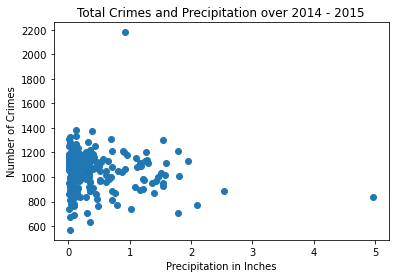

In [23]:
prcpdf = tempdf[tempdf['PRCP'] > 0]
fig, ax = plt.subplots()
plt.scatter(prcpdf['PRCP'], prcpdf['count_cmplnt'])
plt.xlabel('Precipitation in Inches')
plt.ylabel('Number of Crimes')
plt.title('Total Crimes and Precipitation over 2014 - 2015');

There isn't a lot to visually separate holidays from non-holidays as far as crime count goes, but we are going to keep it in the model as that could be due to the relatively large outliers.  

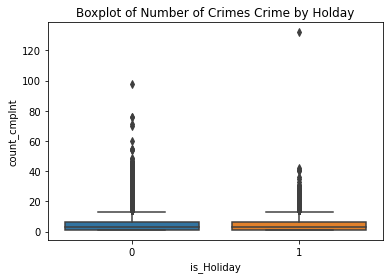

In [24]:
ax = sns.boxplot(x="is_Holiday", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Holday");

Similar to holiday, there isn't a lot to visually separate events from non-events as far as crime count goes, but we are going to keep it in the model as that could be due to the relatively large outliers.  

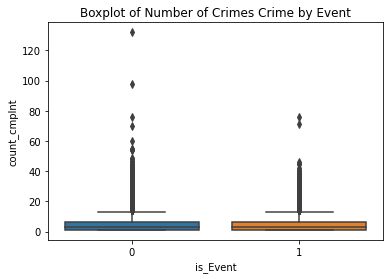

In [25]:
ax = sns.boxplot(x="is_Event", y="count_cmplnt", data=df_Crime)
ax.set_title("Boxplot of Number of Crimes Crime by Event");

Below we remove commas and turn Population into a numeric variable. 

In [7]:
df['Population'] = pd.to_numeric(df['Population'].str.replace(',','', regex = False))

Below is the list of variables still in our dataframe. There are still some non-numeric variables listed.

In [27]:
list(df)

['CMPLNT_FR_DT',
 'Daytime',
 'Day_Name',
 'Month',
 'Day',
 'Year',
 'Season',
 'GeoCell',
 'BORO_NM',
 'PRCP',
 'SNOW',
 'TMIN',
 'TMAX',
 'Population',
 'PC_INCOME',
 'Hm_Sls_Price_Range',
 'Holiday',
 'Event',
 'is_Holiday',
 'is_Event',
 'count_cmplnt',
 'DayOfWeek',
 'Month_No']

Here, we drop the variables that are non-numeric and have been represented in numeric in a different variable. The only variable that hadn't been transformed into numeric was the daytime variable, which was one-hot-encoded using the get_dummies function, which automatically one-hot-encodes then drops the categorical variables remaining in the dataframe.

In [8]:
Clusterdf = df.drop(['Holiday', 'Event', 'Day_Name', 'Month', 'BORO_NM', 'PC_INCOME','Hm_Sls_Price_Range', 'Season', 'CMPLNT_FR_DT'], axis = 1)
Clusterdf = pd.get_dummies(Clusterdf)

As you can see below, all variables are now numeric.

In [9]:
Clusterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170650 entries, 0 to 170649
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Day                    170650 non-null  float64
 1   Year                   170650 non-null  float64
 2   GeoCell                170650 non-null  float64
 3   PRCP                   170650 non-null  float64
 4   SNOW                   170650 non-null  float64
 5   TMIN                   170650 non-null  int64  
 6   TMAX                   170650 non-null  int64  
 7   Population             170650 non-null  int64  
 8   is_Holiday             170650 non-null  int64  
 9   is_Event               170650 non-null  int64  
 10  count_cmplnt           170650 non-null  int64  
 11  DayOfWeek              170650 non-null  int64  
 12  Month_No               170650 non-null  int64  
 13  Daytime_Day            170650 non-null  uint8  
 14  Daytime_Early Morning  170650 non-nu

And, as you can see below, none of our remaining variables contain any NA values. 

In [10]:
Clusterdf.isna().sum()

Day                      0
Year                     0
GeoCell                  0
PRCP                     0
SNOW                     0
TMIN                     0
TMAX                     0
Population               0
is_Holiday               0
is_Event                 0
count_cmplnt             0
DayOfWeek                0
Month_No                 0
Daytime_Day              0
Daytime_Early Morning    0
Daytime_Evening          0
Daytime_Late Night       0
Daytime_Morning          0
Daytime_Night            0
dtype: int64

These are the variables that we will use in our first clustering model. Here are descriptions of the variables below:  

|Variable Label|Variable Type|Data Description|  
| :-|:-|:-|  
|count_cmplnt|Numeric|	Number of crimes per day per time of day per GeoCell. Our target variable|  
|Day|Numeric|Day of the month from 1 to 31|  
|Year|Numeric|The year, either 2014 or 2015|  
|GeoCell|Numeric|The GeoCell that the crime occurred in. We split New York City into 100 GeoCells and used the latitude and longitude of the crime to determine which GeoCell the crime was located in.|  
|PRCP|Numeric|Amount of precipitation on the day the crimes occurred, in inches|  
|SNOW|Numeric|Amount of snow on the day the crimes occurred, in inches|  
|TMIN|Numeric|	The maximum temperature on the day the crimes occurred, in Fahrenheit|  
|TMAX|Numeric|	The minimum temperature on the day the crimes occurred, in Fahrenheit|  
|Population|Numeric| Population of the borough in which the GeoCell is located|  
|is_Holiday|Binary| 1 if the day in question was a holiday, 0 if not|  
|is_Event|Binary|	1 if the day in question had a major event, 0 if not|  
|DayOfWeek|Numeric|	The day of the week. 0 for Monday, 1 for Tuesday etc. |  
|Month_No|Numeric|	The month. 1 for January, 2 for February etc. |  
|Daytime_Day|Binary| 1 signifies if the count_cmplnt variable is related to crimes between 10:00am and 2:00pm, 0 if not|  
|Daytime_Early Morning|Binary|1 signifies if the count_cmplnt variable is related to crimes between 2:00am and 6:00am, 0 if not|  
|Daytime_Evening|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 2:00pm and 6:00pm, 0 if not|  
|Daytime_Late Night|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 10:00pm and 2:00am, 0 if not|  
|Daytime_Morning|Binary|1 signifies if the count_cmplnt variable is related to crimes between 6:00am and 10:00am, 0 if not|  
|Daytime_Night|Binary|	1 signifies if the count_cmplnt variable is related to crimes between 6:00pm and 10:00pm, 0 if not|  

Here, we scale our data. The standard scaler uses the formula z = (x - u) / s, where x is the value of the variable, s is the standard deviation and u is the mean, to calculate the transformation, z, of the variable. This scaling was chosen since it allows for outliers to still be outliers and allows the data to keep its distribution, while making sure that all variables are using the standard deviation as "distance." This allows for the scale of the variables to all be the same, which is extremely important in a K-means model. A single variable with an extremely large scale would dominate variable importance if we did not scale.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
scaleFit = scaler.fit(Clusterdf)
X_cluster = scaleFit.transform(Clusterdf)

<a id="App1ModEval1Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

Initially, we explored running agglomerative clustering and DBSCAN, but our computational power and memory were not enough to use those methods on our dataset. Instead of using a subset, we decided to use K-Means instead. We decided to use k-means++ in order to initialize the model, as k-means++ often leads to better clusters and converges faster. We run the algorithm 50 times each for k = 2 through k = 100. Our maximum number of iterations that we allowed the k-means algorithm to run for was 1000. 50 and 1000 were chosen as we thought that would be large enough to provide us with stable estimates of our clusters. 

In [32]:
from sklearn.cluster import KMeans
inertiaList = []
for i in range(2,101):
    cluster = KMeans(n_clusters = i, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
    results = cluster.fit(X_cluster)
    inertiaList.append(results.inertia_)

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

In [33]:
inertiaList


[2944068.8972118683,
 2778690.731073344,
 2613224.0752438554,
 2408955.0458091213,
 2209653.438454567,
 2057718.9066566303,
 1910464.0029130927,
 1846124.7158275535,
 1798617.0153347622,
 1742232.6002681637,
 1697514.9324313037,
 1660542.426787325,
 1634222.4276870273,
 1597830.0388621702,
 1564551.611601322,
 1527634.0800498307,
 1502641.2172586943,
 1479827.9761358234,
 1461363.7399048982,
 1443625.9411561177,
 1426521.8844202964,
 1403509.7236682859,
 1390092.9284546385,
 1368712.6773127613,
 1354549.0993180056,
 1335133.2252238241,
 1318864.413243057,
 1296894.253722646,
 1282799.1651504233,
 1266146.416714373,
 1266458.5551146609,
 1243635.1516471028,
 1230824.2145951162,
 1217975.697031229,
 1197988.317829568,
 1192320.4658627529,
 1182108.5124947529,
 1175189.7722639781,
 1162848.646025509,
 1158183.425478679,
 1148081.896518429,
 1137114.261832901,
 1129120.2749390414,
 1115644.825014441,
 1114718.648565303,
 1102431.6914940048,
 1090165.7378068827,
 1084047.6450907616,
 108540

As you can see below, our plot of error vs. number of k's has an elbow between 0 and 20.

Text(0, 0.5, 'Inertia')

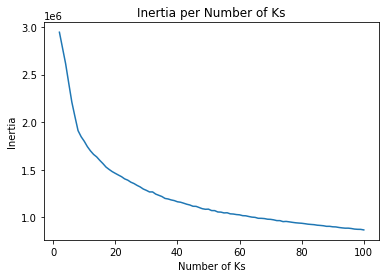

In [34]:
plt.plot(range(2,101), inertiaList);
plt.title('Inertia per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Inertia')

We zoom between 2 and 18, and find that there's a pretty clear break at k = 8. 

Text(0, 0.5, 'Inertia')

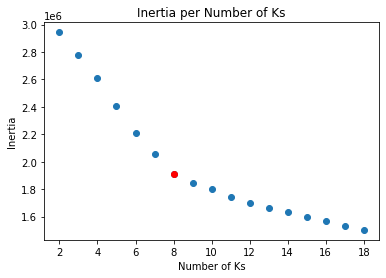

In [35]:
plt.scatter(range(2,19), inertiaList[0:17])
plt.plot(8, inertiaList[6], marker = 'o', color = 'red')
plt.title('Inertia per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Inertia')

Here, we run a for loop to determine the silhouette score for our clusters. We run this from K = 2 to K = 20 as we determined using intertia that the best number of clusters is likely between 2 and 20. 

In [50]:
from sklearn.cluster import KMeans
inertiaList = []
silhouette_list = []
for i in range(2,21):
    cluster = KMeans(n_clusters = i, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
    results2 = cluster.fit(X_cluster)
    inertiaList.append(results.inertia_)
    silhouette_list.append(silhouette_score(Clusterdf, results2.labels_))

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/clu

Below, we plot Silhouette Score vs. Number of K's. Silhouette score is a method of determining how good clusters are, with 1 being the best and -1 being the worst. For all K's between 2 and 18, you can see we have a negative silhouette score. Silhouette score is maximized at K = 2, and flattens out from k = 6 to K = 11. Since K = 2, 3, 4, and 5 all had such high inertias, using K = 8 is appropriate. 

Text(0, 0.5, 'Silhouette Score')

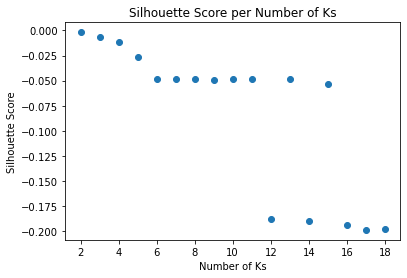

In [53]:
plt.scatter(range(2,19), silhouette_list[0:17])
plt.title('Silhouette Score per Number of Ks')
plt.xlabel('Number of Ks')
plt.ylabel('Silhouette Score')

Here, we run the K-Means algorithm with k = 8 on our full dataframe. The result will give us 8 clusters to analyze. 

In [8]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 8, n_init = 50, init = 'k-means++', n_jobs = -1, max_iter = 1000)
results = cluster.fit(X_cluster)

/home/drew/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Here, we add the cluster that each data point was assigned to to the end of the dataframe for ease of analysis. 

In [9]:
Clusterdf['cluster'] = results.labels_

In [38]:
Clusterdf.head()

,Day,Year,GeoCell,PRCP,SNOW,TMIN,TMAX,Population,is_Holiday,is_Event,count_cmplnt,DayOfWeek,Month_No,Daytime_Day,Daytime_Early Morning,Daytime_Evening,Daytime_Late Night,Daytime_Morning,Daytime_Night,cluster
0,26.0,2014.0,66.0,1.24,0.2,34,51,2250002,0,0,1,2,11,0,0,0,0,1,0,3
1,1.0,2014.0,60.0,0.09,0.0,42,65,2250002,0,0,1,0,12,0,0,0,1,0,0,1
2,10.0,2015.0,15.0,0.26,0.0,51,57,2552911,0,0,2,1,11,0,0,0,0,1,0,3
3,4.0,2014.0,48.0,0.00,0.0,22,35,2250002,0,0,3,1,2,0,0,0,0,1,0,3
4,25.0,2015.0,35.0,0.00,0.0,73,90,2552911,0,0,1,1,8,0,0,0,1,0,0,1


Below, we create a pair plot with the cluster variable colored. There's a lot going on here, so we'll dig deeper into the pair plots that show separation between clusters. 

/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/drew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

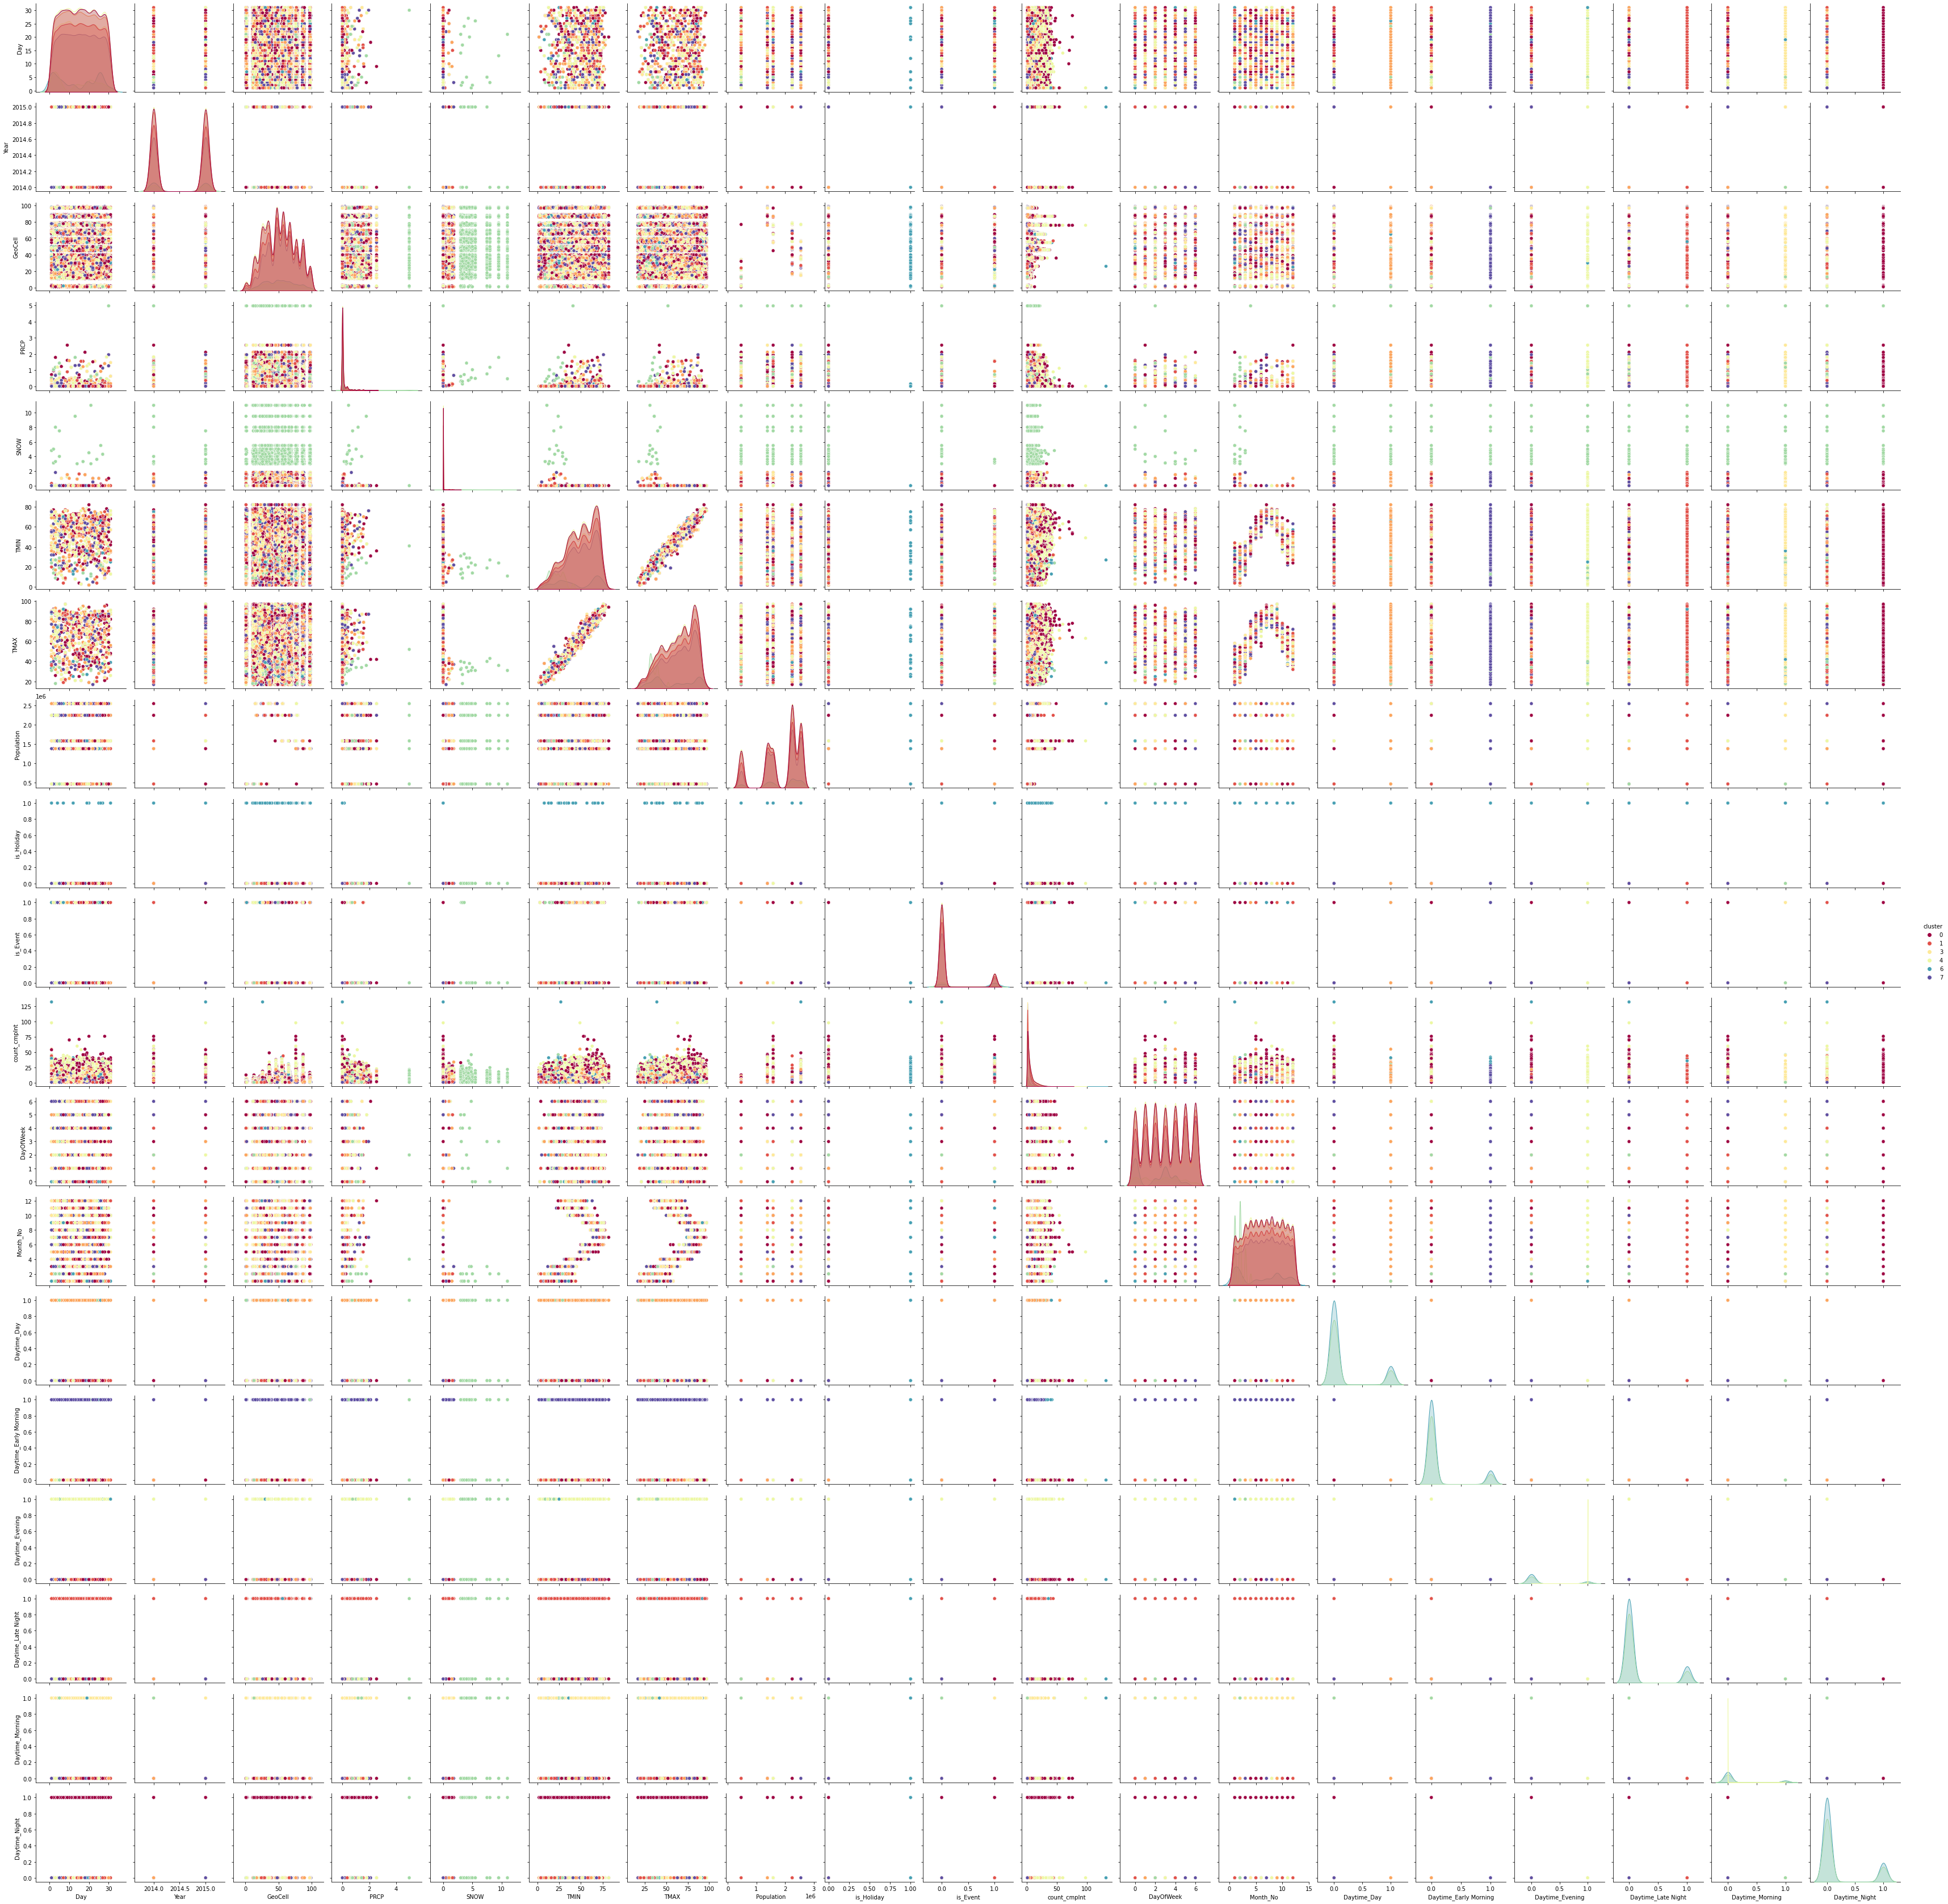

In [39]:
sns.pairplot(Clusterdf, hue = 'cluster', palette = 'Spectral')

Cluster 7 seems to be digging out the "is_Holiday" variable.

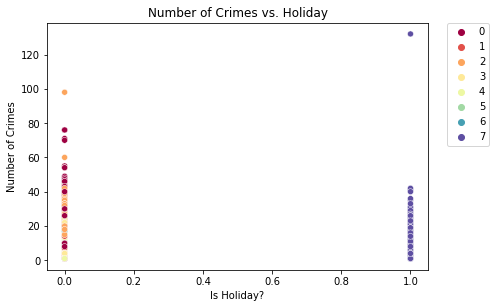

In [28]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'is_Holiday', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Holiday')
plt.xlabel('Is Holiday?')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);


Daytime_Day seems to determine cluster 3, with some outliers. 

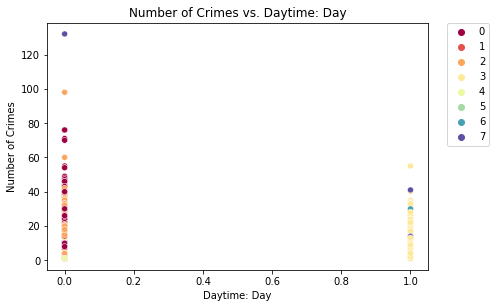

In [29]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Day', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Day')
plt.xlabel('Daytime: Day')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Early Morning seems to determine cluster 4, with some outliers

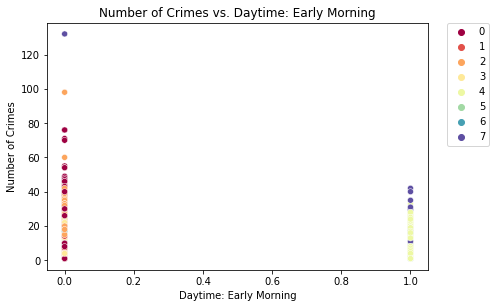

In [30]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Early Morning', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Early Morning')
plt.xlabel('Daytime: Early Morning')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Evening seems to determine the 2nd cluster. 

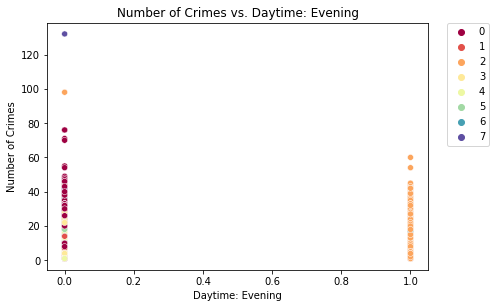

In [31]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Evening', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Evening')
plt.xlabel('Daytime: Evening')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Late Night seems to determine the 1st cluster, with some outliers. 

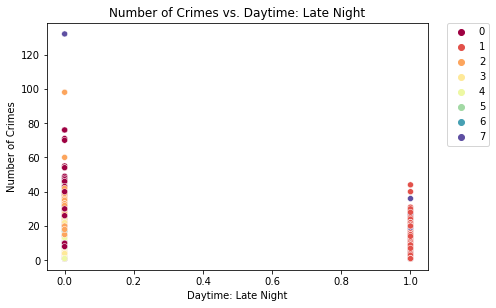

In [32]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Late Night', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Late Night')
plt.xlabel('Daytime: Late Night')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Morning seems to determine the 5th cluster, with some outliers. 

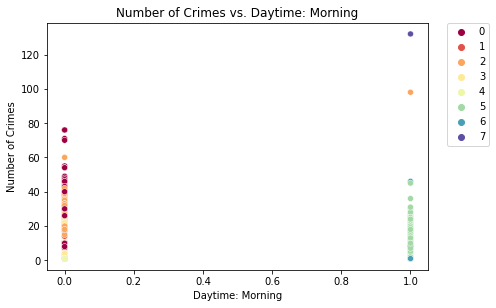

In [33]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Morning', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Morning')
plt.xlabel('Daytime: Morning')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Daytime_Night seems to determine the 0th cluster, with some outliers.

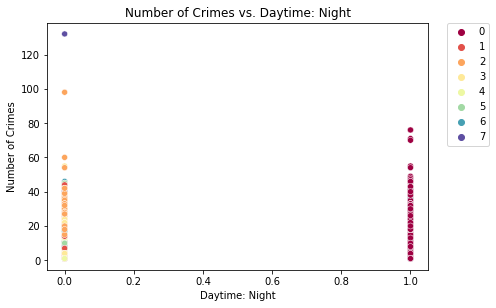

In [34]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'Daytime_Night', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Daytime: Night')
plt.xlabel('Daytime: Night')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

SNOW seems to determine the 6th cluster. 

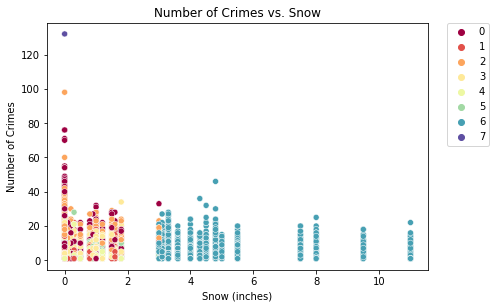

In [35]:
fig = plt.figure(figsize = (15,10))
fig.add_subplot(223);
sns.scatterplot(data = Clusterdf, x = 'SNOW', y = 'count_cmplnt', hue = 'cluster', legend = 'full', palette = 'Spectral');
plt.title('Number of Crimes vs. Snow')
plt.xlabel('Snow (inches)')
plt.ylabel('Number of Crimes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

The above plots are confirmed by looking at the grouped data below. 100% of cluster 0 has Daytime_Night, 100% of cluster 1 has Daytime_Late Night, almost 100% of cluster 2 has Daytime_Evening, 100% of cluster 3 has Daytime_Day, 100% of cluster 4 has Daytime_Early Morning, 100% of cluster 5 has Daytime_Morning, cluster 6 seems to center around very cold, snowy days, and cluster 7 is the only cluster with any "is_Holiday" = 1. There isn't a really compelling story to be told here: the daytime variable, is_Holiday variable and SNOW variable cause the largest separation in the data. This would have been useful information to know prior to our modelling, especially for our KNN model, but this isn't terribly useful data to present to a client. 

In [36]:
Clusterdf.groupby(Clusterdf['cluster']).mean()

,Day,Year,GeoCell,PRCP,SNOW,TMIN,TMAX,Population,is_Holiday,is_Event,count_cmplnt,Daytime_Day,Daytime_Early Morning,Daytime_Evening,Daytime_Late Night,Daytime_Morning,Daytime_Night
cluster,,,,,,,,,,,,,,,,,
0,15.786551,2014.497268,51.867224,0.120320,0.022510,49.574452,64.322494,1.844535e+06,0.0,0.137845,5.870680,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,15.782666,2014.493934,53.544887,0.118400,0.025401,49.823873,64.580486,1.873659e+06,0.0,0.140527,3.802951,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,15.756496,2014.496610,51.402381,0.119406,0.022414,49.493561,64.242304,1.841294e+06,0.0,0.137176,6.084044,0.000000,0.000000,0.999968,0.000000,0.000032,0.000000
3,15.725445,2014.497598,51.948251,0.119662,0.021143,49.536402,64.303001,1.849669e+06,0.0,0.136851,5.030321,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15.765197,2014.500327,55.377953,0.117707,0.024181,49.801008,64.573490,1.910531e+06,0.0,0.140629,3.185358,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5,15.673300,2014.496853,53.352387,0.121297,0.025261,49.478985,64.224459,1.877745e+06,0.0,0.133870,3.647183,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6,12.466092,2014.580607,53.221297,0.685407,5.268917,20.809042,33.454491,1.873401e+06,0.0,0.259072,3.936347,0.184414,0.125818,0.198691,0.141880,0.152290,0.196907
7,14.055798,2014.488666,52.791412,0.012851,0.000000,45.953575,60.202267,1.868436e+06,1.0,0.565824,4.474717,0.180471,0.138405,0.181125,0.164996,0.150828,0.184176


|Cluster|Variable|Notes|  
| :-|:-|:-|  
|Cluster 0 |Daytime_Night| Note: No Daytime variables have an absolutely clean split into a certain cluster. |  
|Cluster 1 |Daytime_Late Night|  |  
|Cluster 2 |Daytime_Evening| |  
|Cluster 3 |Daytime_Day | |  
|Cluster 4 |Daytime_Early Morning| |  
|Cluster 5 |Daytime_Morning  | Typically, lower temperature days as well |  
|Cluster 6 |SNOW |	|  
|Cluster 7 |is_Holiday | The only cluster with any "is_Holiday" = 1 |  



<a id="App1ModEval1Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

See the silhouette score of our final model below. The negative score says that these are not great clusters. These clusters are probably not helpful for any client, but they would have been extremely useful prior to running our KNN model. This data is the exact same data that we fed into our KNN model, and the main separators that the clusters seem to have dug out were the daytime variable, the snow variable and the is_Holiday variable. These variables create the largest separators, and thus create the clusters. Knowing the variables that create the largest separations is key for KNN, as KNN also uses distance to calculate how similar two points are. The clustering algorithm is telling us that the variables that create the most similarity are the daytime, is_Holiday and SNOW variables. Knowing this prior to modelling would have aided in our analysis.

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(Clusterdf, results.labels_)

-0.04854761882131042

<a id="App1ModEval2"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 2

<a id="App1ModEval2DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

Method 2 described below is a slightly different approach to apply clustering to our crime dataset.  Specifically, we will use crime condition information to identify different patterns in terms of when crimes take place and what the weather conditions are. From these patterns, we will then generalize and explain the meaning behind the clusters we identify.  

In this evaluation, we use a subset of features of those used in Modeling and Evaluation 1. The features below were specifically chosen to avoid location specific features and only leaving crime condition features as listed below.

|Feature | Description |
|:-------|:------------|
|Daytime | This specifies the general time of day a crime occurred.  i.e. Early Morning, Morning, Day, Evening, Late Evening, Night |
|Day_Name | The weekday name in which a crime occurred |
|Month | The month in which a crime occurred |
|Season | The season in which a crime occurred.  i.e. Winter, Spring, Summer, Fall |
|is_Holiday | Indicates if there was a holiday on the day in which a crime occurred (Boolean 1 = Holiday) |
|is_Event | Indicates if there was an event held in the city on the day a crime occurred (Boolean 1 = Event) |
|PRCP | The amount of precipitation in inches on the day a crime occurred |
|SNOW | The amount of snow in inches on the day a crime occurred |
|TMIN | The minimum temperature in Fahrenheit on the day a crime occurred |
|TMAX | The maximum temperature in Fahrenheit on the day a crime occurred |


With the fields above, we will be able to identify how the records in our dataset cluster and determine the mode of the string features and the average of the continuous features to arrive at a general description.

In [6]:
#load csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df_Crime = pd.read_csv(file_path)

In [7]:
df_Crime.head(5)

,CMPLNT_FR_DT,Daytime,Day_Name,Month,Day,Year,Season,GeoCell,BORO_NM,count_cmplnt,...,SNOW,TMIN,TMAX,Population,PC_INCOME,Hm_Sls_Price_Range,Holiday,Event,is_Holiday,is_Event
0,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,15.0,BROOKLYN,1,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
1,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,16.0,BROOKLYN,4,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
2,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,25.0,BROOKLYN,7,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
3,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,26.0,BROOKLYN,2,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1
4,1/1/2014,Day,Wednesday,January,1.0,2014.0,Winter,34.0,BROOKLYN,1,...,0.0,24,33,"2,552,911",41399,High,New Year's Day,New York Boat Show,1,1


In [8]:
df_Crime.dtypes

CMPLNT_FR_DT           object
Daytime                object
Day_Name               object
Month                  object
Day                   float64
Year                  float64
Season                 object
GeoCell               float64
BORO_NM                object
count_cmplnt            int64
PRCP                  float64
SNOW                  float64
TMIN                    int64
TMAX                    int64
Population             object
PC_INCOME               int64
Hm_Sls_Price_Range     object
Holiday                object
Event                  object
is_Holiday              int64
is_Event                int64
dtype: object

### Data Processing

We one hot encode the categorical variables.   

|Feature |
|:-------|
|Daytime |
|Day_Name |
|Month |
|Season |


In [9]:
#one hot encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season']
columns_no_change = ['is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX']

df_existing = df_Crime[columns_no_change]
existing_cols = df_existing.to_numpy()

#encoder 
ohe = OneHotEncoder(sparse=False)

#ohe separate columns
encoded_columns = ohe.fit_transform(df_Crime[columns_to_encode])

#concatenate processed columns back together for X
df_Crime = np.concatenate([encoded_columns,existing_cols],axis=1)

#get the column names back to the dataframe
df1 = pd.DataFrame(df_Crime)
feature_names = ohe.get_feature_names().tolist()
col_names = feature_names+columns_no_change
df1.columns = col_names
df_Crime = df1


We scale the continuous variables so that we can better calculate distance when clustering.


|Feature |
|:-------|
|PRCP |
|SNOW |
|TMIN |
|TMAX |

In [10]:
#scale specific columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

columns_to_scale = ['PRCP','SNOW','TMIN','TMAX']
#get a list of all columns without the columns to scale above
lstCols = df_Crime.columns.values.tolist()
lstCols.remove('PRCP')
lstCols.remove('SNOW')
lstCols.remove('TMIN')
lstCols.remove('TMAX')
columns_no_change = lstCols

df_existing = df_Crime[columns_no_change]
existing_cols = df_existing.to_numpy()

#scaler
scaler = StandardScaler()

#scale and encode separate columns
scaled_columns = scaler.fit_transform(df_Crime[columns_to_scale])

#concatenate processed columns back together for X_train
X_np = np.concatenate([scaled_columns,existing_cols],axis=1)

#convert the numpy array back to a pandas dataframe for X_train
df1 = pd.DataFrame(X_np)
#get the column names back to the dataframe
col_names = columns_to_scale+columns_no_change
df1.columns = col_names
df_Crime = df1

In [8]:
df_Crime.head()

,PRCP,SNOW,TMIN,TMAX,x0_Day,x0_Early Morning,x0_Evening,x0_Late Night,x0_Morning,x0_Night,...,x2_May,x2_November,x2_October,x2_September,x3_Fall,x3_Spring,x3_Summer,x3_Winter,is_Holiday,is_Event
0,-0.350032,-0.15313,-1.385995,-1.599525,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,-0.350032,-0.15313,-1.385995,-1.599525,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,-0.350032,-0.15313,-1.385995,-1.599525,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,-0.350032,-0.15313,-1.385995,-1.599525,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,-0.350032,-0.15313,-1.385995,-1.599525,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### PCA

We perform PCA to reduce dimensionality so that we can work with only 2-dimensions for visualizing and clustering

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principal_components = pca.fit_transform(df_Crime)

df_PCA = pd.DataFrame(data=principal_components,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])

We then generate a scree plot below to get a sense of how much variability in the dataset our new principle components explain.  we are able to explain 55% of the variability in the dataset with the first two principle components.

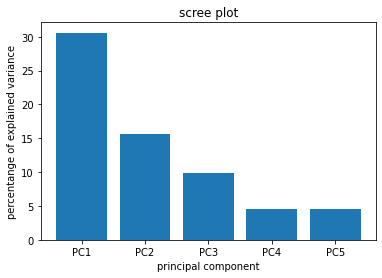

In [10]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

We then generate a scatterplot using the first two principle components.  The data does appear to have a few clusters. We'll analyze further below to see just how we'll be able to cluster the data.

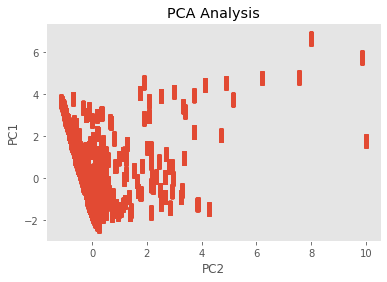

In [11]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X = df_PCA[['PC1','PC2']].values
plt.scatter(X[:,1], X[:,0]+np.random.random(X[:,1].shape)/2,
            s=20)

plt.xlabel('PC2'), plt.ylabel('PC1')
plt.grid()
plt.title('PCA Analysis')
plt.show()

<a id="App1ModEval2Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis


We start by looping through various k values and fitting a KMeans cluster using euclidean to determine the optimal k value.  Here, it appears that k=6 is optimal given that's where the curve begins to flatten out in the below elbow graph.

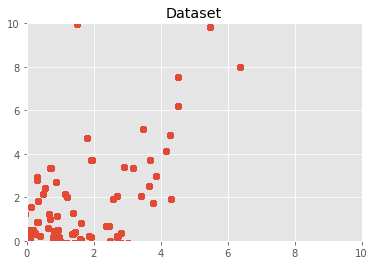

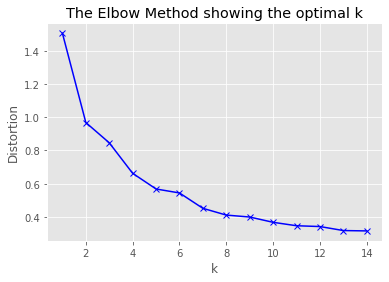

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

x1 = df_PCA[['PC1']].to_numpy()
x2 = df_PCA[['PC2']].to_numpy()

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o','v','s']

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
#get the first two principle components

X = df_PCA[['PC1','PC2']].values

Let's evaluate the optimal number of clusters for our data using the silhouette vs cluster size graph below.  It again appears that 6 clusters appears to be the optimal number of clusters as we can see the optimal Silhouette score using euclidean is highest at 6 clusters.

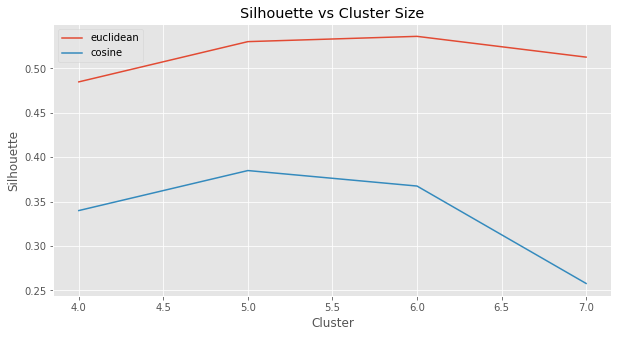

In [17]:
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(4,8)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(X)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(X, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()

We then fit a k-means++ with n_clusters=6 based on our analysis above and plot the data again to see how the clusters are assigned.  It does appear that we are able to cluster and for the most part, the clusters do appear separable.

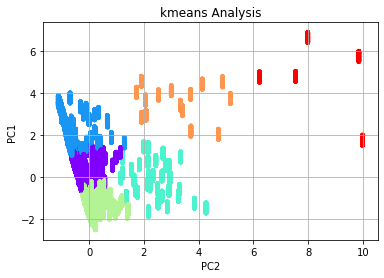

In [13]:
from sklearn.cluster import KMeans


cls = KMeans(n_clusters=6,init='k-means++',random_state=123)
cls.fit(X)

cluster_label = cls.labels_ #the labels from kmeans clustering

%matplotlib inline
plt.scatter(X[:,1], X[:,0]+np.random.random(X[:,1].shape)/2,
            c=cluster_label, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.xlabel('PC2'), plt.ylabel('PC1')
plt.grid()
plt.title('kmeans Analysis')
plt.show()

###  Describing the Results

Now, we'll take our cluster labels and add them back to the original dataset so that we can begin to analyze the patterns that make up the different clusters.  This will allow us to describe what is different about the clusters.

In [15]:
#here we are going to get the cluster labels and then add them back to the original data to identify patterns in the clusters for explain-ability
#get cluster labels
df_cluster_labels = pd.DataFrame(cluster_label, columns=['cluster_id'])
#load original csv
file_path = "C:\\Users\\BGaither\\OneDrive - McAfee\\Other\\school\\SMU\\Courses\\Fall 2020\\Machine Learning I\\Lab1\\Data_NYPD\\Modified_Data_Sets\\NYPD_Rollup_All_Crimes_Joined_All.csv"
#load Data into Pandas
df = pd.read_csv(file_path)
#add cluster labels back to original data
df_withLabs = pd.concat([df,df_cluster_labels],axis=1)

In [16]:
df_withLabs = df_withLabs[['Daytime','Day_Name','Month','Season','is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX','cluster_id']]
df_withLabs.head(5)

,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,PRCP,SNOW,TMIN,TMAX,cluster_id
0,Day,Wednesday,January,Winter,1,1,0.0,0.0,24,33,1
1,Day,Wednesday,January,Winter,1,1,0.0,0.0,24,33,1
2,Day,Wednesday,January,Winter,1,1,0.0,0.0,24,33,1
3,Day,Wednesday,January,Winter,1,1,0.0,0.0,24,33,1
4,Day,Wednesday,January,Winter,1,1,0.0,0.0,24,33,1


In [17]:
df_mode = df_withLabs.groupby(['cluster_id']).apply(pd.DataFrame.mode).reset_index(drop=True).drop(df_withLabs[['PRCP','SNOW','TMIN','TMAX']], axis=1)
df_mode

,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,cluster_id
0,Evening,Sunday,April,Spring,0,0,0
1,Evening,Wednesday,January,Winter,0,0,1
2,Evening,Wednesday,October,Fall,0,0,2
3,Night,Monday,August,Summer,0,0,3
4,Evening,Tuesday,January,Winter,0,0,4
5,Night,Thursday,February,Winter,0,0,5


In [18]:
df_avg = df_withLabs.groupby(['cluster_id']).agg(
            avg_PRCP=('PRCP','mean'),
            avg_Snow=('SNOW','mean'),
            avg_TMIN=('TMIN','mean'),
            avg_TMAX=('TMAX','mean')).reset_index(drop=True)
df_avg

,avg_PRCP,avg_Snow,avg_TMIN,avg_TMAX
0,0.057233,0.000000,47.344741,62.343401
1,0.035243,0.075731,24.867275,37.657917
2,1.231788,0.005680,56.112797,69.879448
3,0.046998,0.000000,66.958027,82.919093
4,0.793813,3.275501,23.134038,33.983037
5,1.828299,7.168891,24.398666,40.456214


Below, we have shown the average temp, precipitation, and snow along with the most frequent time related values to get an idea of the differences between the clusters and how to describe them.

In [19]:
df_explain = pd.concat([df_avg,df_mode],axis=1)
df_explain

,avg_PRCP,avg_Snow,avg_TMIN,avg_TMAX,Daytime,Day_Name,Month,Season,is_Holiday,is_Event,cluster_id
0,0.057233,0.000000,47.344741,62.343401,Evening,Sunday,April,Spring,0,0,0
1,0.035243,0.075731,24.867275,37.657917,Evening,Wednesday,January,Winter,0,0,1
2,1.231788,0.005680,56.112797,69.879448,Evening,Wednesday,October,Fall,0,0,2
3,0.046998,0.000000,66.958027,82.919093,Night,Monday,August,Summer,0,0,3
4,0.793813,3.275501,23.134038,33.983037,Evening,Tuesday,January,Winter,0,0,4
5,1.828299,7.168891,24.398666,40.456214,Night,Thursday,February,Winter,0,0,5


In [29]:
#label encode the categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

columns_to_encode = ['Daytime','Day_Name','Month','Season']
columns_no_change = ['is_Holiday','is_Event','PRCP','SNOW','TMIN','TMAX','cluster_id']

df_existing = df_withLabs[columns_no_change]
df_encoded = df_withLabs[columns_to_encode]
df_enc = df_withLabs

le = LabelEncoder()

df_enc[columns_to_encode] = df_withLabs[columns_to_encode].apply(le.fit_transform)
df_enc = df_enc[columns_to_encode+columns_no_change]

Pair plots with cluster color codes allow us to get a sense of how the clusters show separation.  We can se that there does appear to be a clear difference between clusters 1 and 0 in terms of temperature (TMIN and TMAX) as well as Months.  

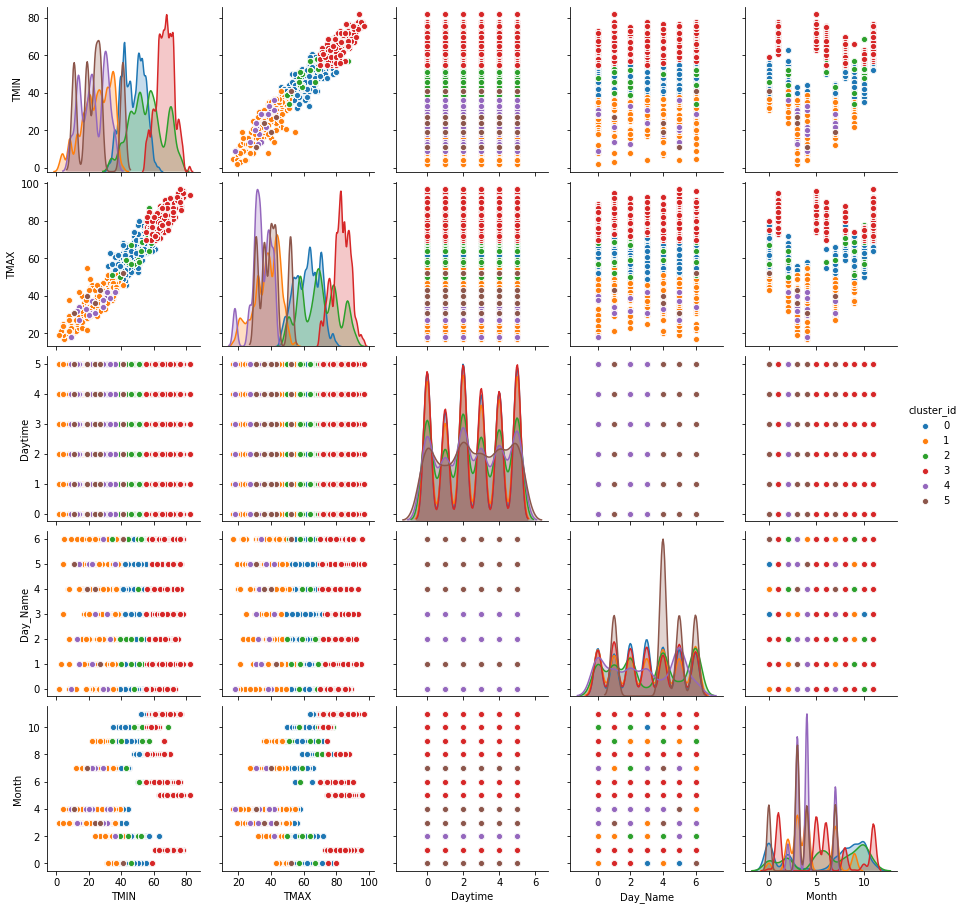

In [39]:
sns.pairplot(df_enc[['TMIN','TMAX','Daytime','Day_Name','Month','cluster_id']],hue='cluster_id')

## Summary

Below, we have used the data analyzed above to give meaning to the clusters identified.  This was done by looking at the mode of categorical data and the average of our continuous data by cluster along with visual representations from the pair plots above.

All clusters appear to primarily occur in the evening/night.

|Cluster id |Cluster Name | Description|
|:--------|:--------|:------------|
|Cluster 0| Fair Weather Fall Crimes | Occurs in Fall during the middle of the week in mild temperatures with little to no precipitation |
|Cluster 1 |Cold and Calm Crimes | Occurs in Fall during the middle of the week in mild temperatures with little to no precipitation |
|Cluster 2 |Fair Weather Sprint Crimes | Occurs in Spring on the weekend in mild temperatures with little to no precipitation |
|Cluster 3 |Cold and Inclimate Weather Crimes | Occurs in Winter during the week in cooler temperatures with heavy precipitation |
|Cluster 4 |Hot and Dry Crimes | Occurs in the Summer during the week in warmer weather with little to no precipitation |
|Cluster 5 |Cold and Moderate Crimes | Occurs in Winter during the week in cooler weather with moderate precipitation |



<a id="App1ModEval2Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

Below, we calculate the silhouette score of our clusters.  The value closer to 1 between -1 and +1 indicates better clustering as measured by denseness and separability.  With a silhouette score of .54, it indicates it's not perfect clustering but we do have denseness and separability as can be seen in the above visualization.

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(X, cluster_label)

0.5359916545678038

<a id="App1Compare"></a>
<a href="#top">Back to Top</a>
## Approach 1 - Comparing Effectiveness of Method 1 and 2

<a id="Approach2"></a>
<a href="#top">Back to Top</a>
# Approach 2

<a id="App2ModEval1"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 1

<a id="App2ModEval1DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

<a id="App2ModEval1Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

<a id="App2ModEval1Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

<a id="App2ModEval2"></a>
<a href="#top">Back to Top</a>
## Modeling and Evaluation 2

<a id="App2ModEval2DU"></a>
<a href="#top">Back to Top</a>
### Data Understanding

<a id="App2ModEval2Cluster"></a>
<a href="#top">Back to Top</a>
### Cluster Analysis

<a id="App2ModEval2Effectiveness"></a>
<a href="#top">Back to Top</a>
### Measure Effectiveness

<a id="App2Compare"></a>
<a href="#top">Back to Top</a>
## Approach 2 - Comparing Effectiveness of Method 1 and 2

<a id="Deploy"></a>
<a href="#top">Back to Top</a>
# Deployment

<a id="Exceptional"></a>
<a href="#top">Back to Top</a>
# Exceptional Work